# <span style="color:blue"> Bike sharing </span>

## <p> <span style="color:brown">Bike sharing companies allow people to rent bikes for short trips. Someone can rent a bike from a station near their location, take a ride, and then return the bike to any other station.
    
This dataset describes the daily activity of Capital Bikeshare (a bike-sharing company) and can be found 
    [here](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)</p> </span>

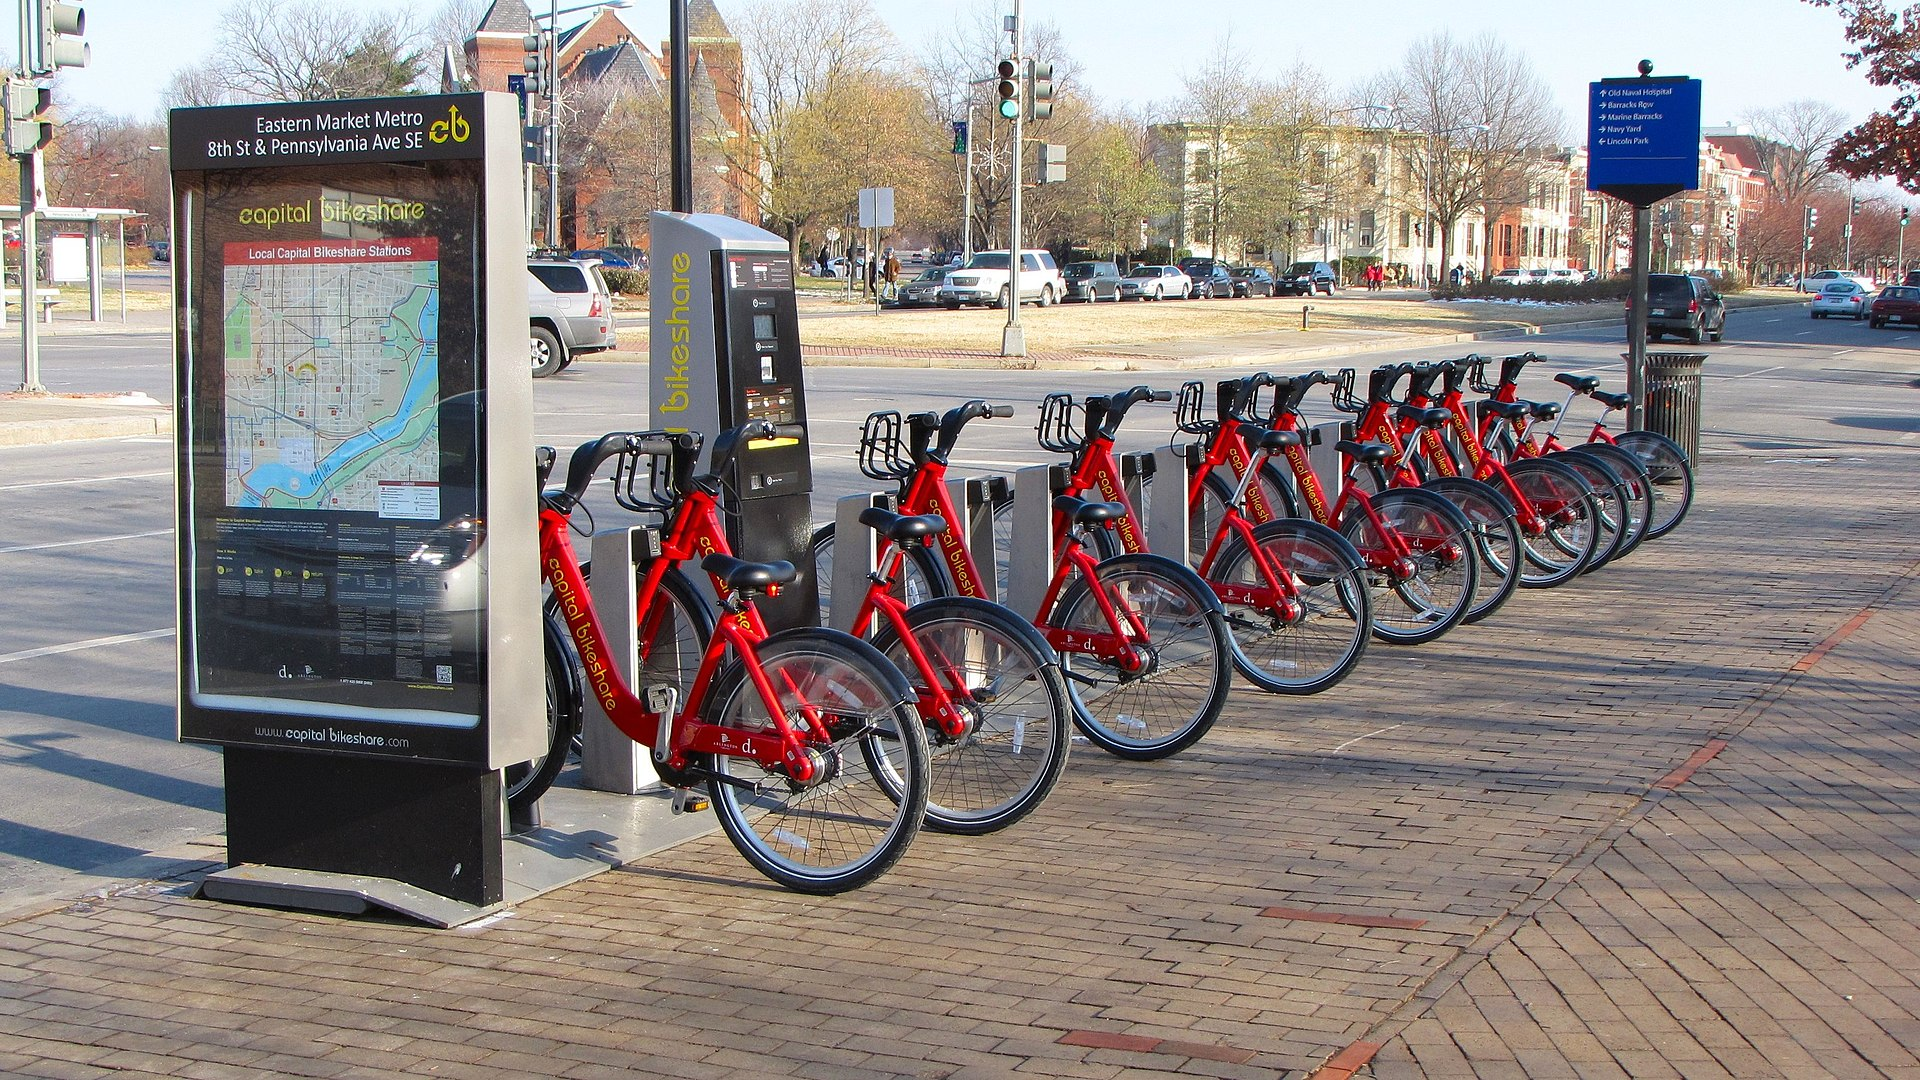

 Here are some of the columns we'll be focusing on:
 
 
|  Column  | Description                                                                                     |
| :---     | :---                                                                                            |
| dteday   | date in year-month-day format.
| temp     | normalized temperature in Celsius (1 is the maximum value, and it's equivalent to 41 Celsius degrees).
| atemp    | normalized feeling temperature in Celsius (1 is the maximum value, and it's equivalent to 50 Celsius degrees).
| hum      | normalized humidity.
| windspeed| normalized wind speed.
| casual   | the number of casual (non-registered) people who rented a bike that day.
| registered | the number of registered people who rented a bike that day (registered people bought a membership).
| cnt        | the total number of people who rented a bike (casual plus registered)
| weathersit | categorical 1: clear 2: mist/cloudy 3: light rain/snow, thunderstorm 4: heavy rain , snow, ice pellets, fog|
| working day| caetegorical 0 : weekend 1 : working |
| weekday    | 0 Sunday 6 Saturday



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

bike_sharing = pd.read_csv('day.csv')

print(bike_sharing.head(5))
print(bike_sharing.tail(5))

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
     instant      dteday  

In [2]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


## <span style ="color:red">Q1 How the total number of bike rentals changed over time </span>

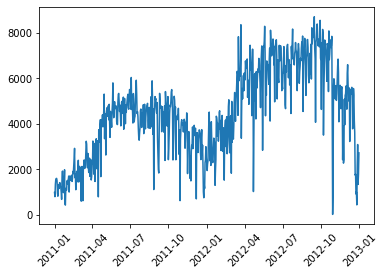

In [3]:
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])
plt.plot(bike_sharing['dteday'], bike_sharing['cnt'])
plt.xticks(rotation=45)
plt.show()

 ### <span style ="color:green">Obs1: </span>
* <span style ="color:green">The number of rented bikes is at its lowest during the winter months and at its highest during the summer.</span>
* <span style ="color:green">Assumption : Biking is an outdoor activity, and people often don't ride when it's too cold outside.</span>
* <span style ="color:green">We can  further expand on this comparing no. of bikes rented vs temperature</span>

## <span style ="color:red">Q2 Casual vs Registered Bike Renting </span>

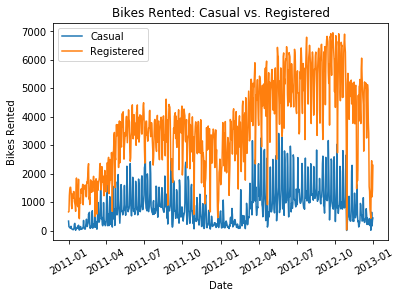

In [4]:
plt.plot(bike_sharing['dteday'], bike_sharing['casual'],label='Casual')
plt.plot(bike_sharing['dteday'], bike_sharing['registered'],label='Registered')
plt.xticks(rotation=30)
plt.xlabel('Date')
plt.ylabel('Bikes Rented')
plt.title('Bikes Rented: Casual vs. Registered')
plt.legend()
plt.show()

## <span style ="color:red">Q3 Similarity between air temperature and the number of bikes rented 

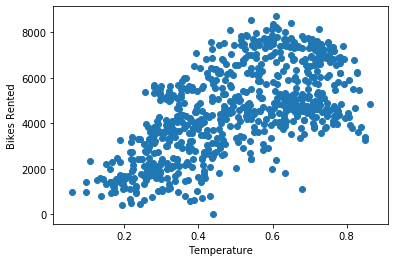

In [5]:
plt.scatter(bike_sharing['temp'], bike_sharing['cnt'])
plt.xlabel('Temperature')
plt.ylabel('Bikes Rented')
plt.show()

 ### <span style ="color:green">Obs3 : The overall direction of the points is upward (seen from left to right) aka Positive Correlation. This is because as the temperature increases, the number of bike rentals tends to grow too.</span>


## <span style ="color:red">Q4 Windspeed vs number of bikes rented 

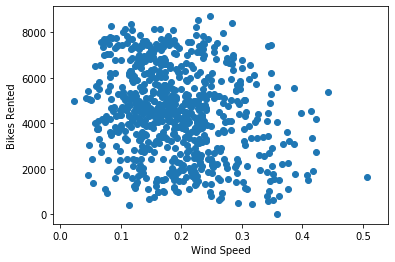

In [6]:
plt.scatter(bike_sharing['windspeed'],bike_sharing['cnt'])
plt.xlabel('Wind Speed')
plt.ylabel('Bikes Rented')
plt.show()

 ### <span style ="color:green">Obs4 : There is Negative Correlation. This is because as the windspeed increases, the number of bike rentals tends to decrease too.</span>


Correlation: -0.2484890986437141


Text(0, 0.5, 'Humidity')

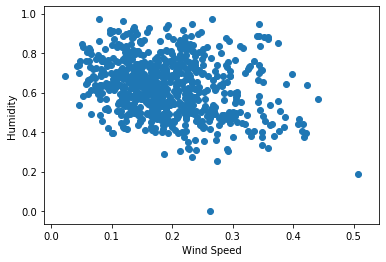

In [7]:
wind_hum_corr = bike_sharing['windspeed'].corr(bike_sharing['hum'])
print("Correlation:",wind_hum_corr)
plt.scatter(bike_sharing['windspeed'], bike_sharing['hum'])
plt.xlabel('Wind Speed')
plt.ylabel('Humidity')

In [8]:
bike_sharing.corr()[['cnt', 'casual', 'registered']]

,cnt,casual,registered
instant,0.628830,0.275255,0.659623
season,0.406100,0.210399,0.411623
yr,0.566710,0.248546,0.594248
mnth,0.279977,0.123006,0.293488
holiday,-0.068348,0.054274,-0.108745
weekday,0.067443,0.059923,0.057367
workingday,0.061156,-0.518044,0.303907
weathersit,-0.297391,-0.247353,-0.260388
temp,0.627494,0.543285,0.540012
atemp,0.631066,0.543864,0.544192


## <span style ="color:red">Q5 Working day vs Customer Type

In [9]:
bike_sharing['workingday'].value_counts()

1    500
0    231
Name: workingday, dtype: int64

In [10]:
bike_sharing.corr()['workingday'][['casual', 'registered']]

casual       -0.518044
registered    0.303907
Name: workingday, dtype: float64

 ### <span style ="color:green">Obs5 : These values suggest that registered users tend to use the bikes more on working days (to commute to work probably), while casual (non-registered) users tend to rent the bikes more on the weekends and holidays (maybe to spend some leisure time)</span>
 
 To corroborate or disprove these observations, we'll calculate the average number of rentals for casual and registered users on working and non-working days.

## <span style ="color:red">Q6 Calculate average rentals based on Customer Type vs Working Day.

In [11]:
weekdays = bike_sharing['weekday'].unique()
#print(weekdays)
casual_avg = {}
registered_avg = {}
for w in weekdays:
    casual_avg[w] = round(bike_sharing.loc[bike_sharing['weekday'] == w,['casual']].mean(),2)
    registered_avg[w] = round(bike_sharing.loc[bike_sharing['weekday'] == w,['registered']].mean(),2)

casual_df = pd.DataFrame(casual_avg)
print(casual_df)
print(registered_avg)

              6       0       1       2       3       4       5
casual  1465.26  1338.3  674.13  556.18  551.14  590.96  752.29
{6: registered    3085.29
dtype: float64, 0: registered    2890.53
dtype: float64, 1: registered    3663.99
dtype: float64, 2: registered    3954.48
dtype: float64, 3: registered    3997.39
dtype: float64, 4: registered    4076.3
dtype: float64, 5: registered    3938.0
dtype: float64}


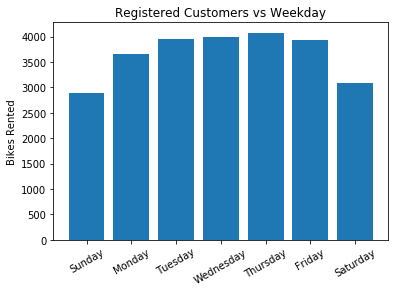

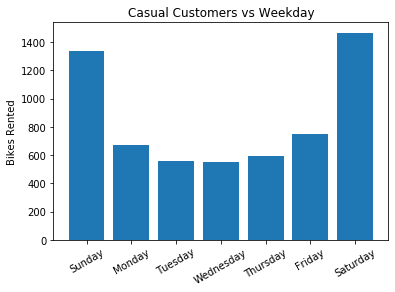

In [14]:
weekday_averages = bike_sharing.groupby('weekday').mean()[['casual', 'registered']].reset_index() 
plt.bar(weekday_averages['weekday'], weekday_averages['registered'])
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],rotation = 30)
plt.title('Registered Customers vs Weekday')
plt.ylabel('Bikes Rented')
plt.show()

plt.bar(weekday_averages['weekday'], weekday_averages['casual'])
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],rotation = 30)
plt.title('Casual Customers vs Weekday')
plt.ylabel('Bikes Rented')
plt.show()          

We are able to corroborate, we'll calculate the average number of rentals for casual and registered users on working and non-working days.

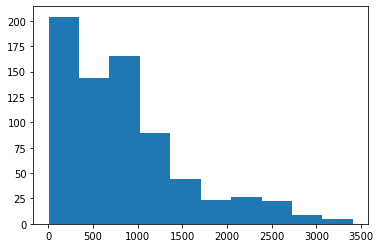

In [15]:
plt.hist(bike_sharing['casual'])
plt.show()